In [1]:
import pandas as pd
import dataInspectionTools as ditools
#import dataPreprocessingTools as dptools #yet to be implemented

df = pd.read_csv('loan_data_2007_2014.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

colCat = pd.read_csv('columnCategory.csv')
colCat.rename(columns = {'columns':'columnsName'}, inplace = True)

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_4160/3988384187.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


In [2]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
colCat

,Category,columnsName
0,Assesment Data,"['id', 'member_id', 'loan_amnt', 'term', 'home..."
1,Loan Activity data,"['funded_amnt', 'funded_amnt_inv', 'int_rate',..."


## Feature selection
since 18 out of 74 columns are inactive, we will need to drop the inactive columns to deacrease the DataFrame size

In [4]:
colCat[colCat['Category'] == 'Assesment Data'].columnsName[0]

"['id', 'member_id', 'loan_amnt', 'term', 'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'application_type', 'emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med']"

We see that the list of columns are contained in a string, a conversion function is needed

In [5]:
def convert(lst):
    return eval(lst)

In [6]:
assessmentColumns = convert(colCat[colCat['Category'] == 'Assesment Data'].columnsName[0])
loanActivityColumns = convert(colCat[colCat['Category'] == 'Loan Activity data']['columnsName'].values[0])

print(assessmentColumns[:5])
print(loanActivityColumns[:5])

['id', 'member_id', 'loan_amnt', 'term', 'home_ownership']
['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'grade']


In [7]:
activeColumns = assessmentColumns + loanActivityColumns
len(activeColumns)

56

So now we have the column list of the active feature

In [8]:
df = df[activeColumns]
df.head()

,id,member_id,loan_amnt,term,home_ownership,verification_status,pymnt_plan,url,purpose,zip_code,...,collection_recovery_fee,last_pymnt_amnt,revol_util,total_acc,last_pymnt_d,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,36 months,RENT,Verified,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,860xx,...,0.00,171.62,83.7,9.0,Jan-15,NaN,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,60 months,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,car,309xx,...,1.11,119.66,9.4,4.0,Apr-13,NaN,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,36 months,RENT,Not Verified,n,https://www.lendingclub.com/browse/loanDetail....,small_business,606xx,...,0.00,649.91,98.5,10.0,Jun-14,NaN,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,36 months,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,other,917xx,...,0.00,357.48,21.0,37.0,Jan-15,NaN,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,60 months,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,other,972xx,...,0.00,67.79,53.9,38.0,Jan-16,NaN,0.0,NaN,NaN,NaN


Now the DataFrame is only containing 56 active columns

## Descriptive analysis

Firstly we will separate the columns by the data type
- numerical data -> numCols
- object data -> catCols

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   term                         466285 non-null  object 
 4   home_ownership               466285 non-null  object 
 5   verification_status          466285 non-null  object 
 6   pymnt_plan                   466285 non-null  object 
 7   url                          466285 non-null  object 
 8   purpose                      466285 non-null  object 
 9   zip_code                     466285 non-null  object 
 10  addr_state                   466285 non-null  object 
 11  dti                          466285 non-null  float64
 12  application_type             466285 non-null  object 
 13 

it seems 56 feature is too long to be displayed

In [10]:
numCols, catCols = ditools.getNumericalCategorical(df)
print('Numerical Columns contained',str(len(numCols)),'columns')
print('Categorical Columns contained',str(len(catCols)),'columns')

Numerical Columns contained 34 columns
Categorical Columns contained 22 columns


In [11]:
df[numCols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   dti                          466285 non-null  float64
 4   annual_inc                   466281 non-null  float64
 5   delinq_2yrs                  466256 non-null  float64
 6   inq_last_6mths               466256 non-null  float64
 7   mths_since_last_delinq       215934 non-null  float64
 8   mths_since_last_record       62638 non-null   float64
 9   open_acc                     466256 non-null  float64
 10  pub_rec                      466256 non-null  float64
 11  collections_12_mths_ex_med   466140 non-null  float64
 12  funded_amnt                  466285 non-null  int64  
 13 

In [12]:
df[catCols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   emp_title            438697 non-null  object
 1   desc                 125983 non-null  object
 2   pymnt_plan           466285 non-null  object
 3   term                 466285 non-null  object
 4   last_pymnt_d         465909 non-null  object
 5   verification_status  466285 non-null  object
 6   next_pymnt_d         239071 non-null  object
 7   title                466265 non-null  object
 8   grade                466285 non-null  object
 9   emp_length           445277 non-null  object
 10  last_credit_pull_d   466243 non-null  object
 11  purpose              466285 non-null  object
 12  earliest_cr_line     466256 non-null  object
 13  addr_state           466285 non-null  object
 14  application_type     466285 non-null  object
 15  loan_status          466285 non-nu

now we see that the function we used are correct

### Numerical Data 

In [13]:
df.describe()

,id,member_id,loan_amnt,dti,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,revol_util,total_acc,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,4.662810e+05,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,...,466285.000000,466285.000000,466285.000000,465945.000000,466256.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.307973e+07,1.459766e+07,14317.277577,17.218758,7.327738e+04,0.284678,0.804745,34.104430,74.306012,11.187069,...,85.344211,8.961534,3123.913796,56.176947,25.064430,42.852547,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,1.089371e+07,1.168237e+07,8286.509164,7.851121,5.496357e+04,0.797365,1.091598,21.778487,30.357653,4.987526,...,552.216084,85.491437,5554.737393,23.732628,11.600141,21.662591,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,5.473400e+04,7.047300e+04,500.000000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.639987e+06,4.379705e+06,8000.000000,11.360000,4.500000e+04,0.000000,0.000000,16.000000,53.000000,8.000000,...,0.000000,0.000000,312.620000,39.200000,17.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,1.010790e+07,1.194108e+07,12000.000000,16.870000,6.300000e+04,0.000000,0.000000,31.000000,76.000000,10.000000,...,0.000000,0.000000,545.960000,57.600000,23.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,2.073121e+07,2.300154e+07,20000.000000,22.780000,8.896000e+04,0.000000,1.000000,49.000000,102.000000,14.000000,...,0.000000,0.000000,3187.510000,74.700000,32.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,3.809811e+07,4.086083e+07,35000.000000,39.990000,7.500000e+06,29.000000,33.000000,188.000000,129.000000,84.000000,...,33520.270000,7002.190000,36234.440000,892.300000,156.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


We can see some of the descriptive analytics for the data but it seems not to be displayed greatly, we might want to see the distribution for the data.

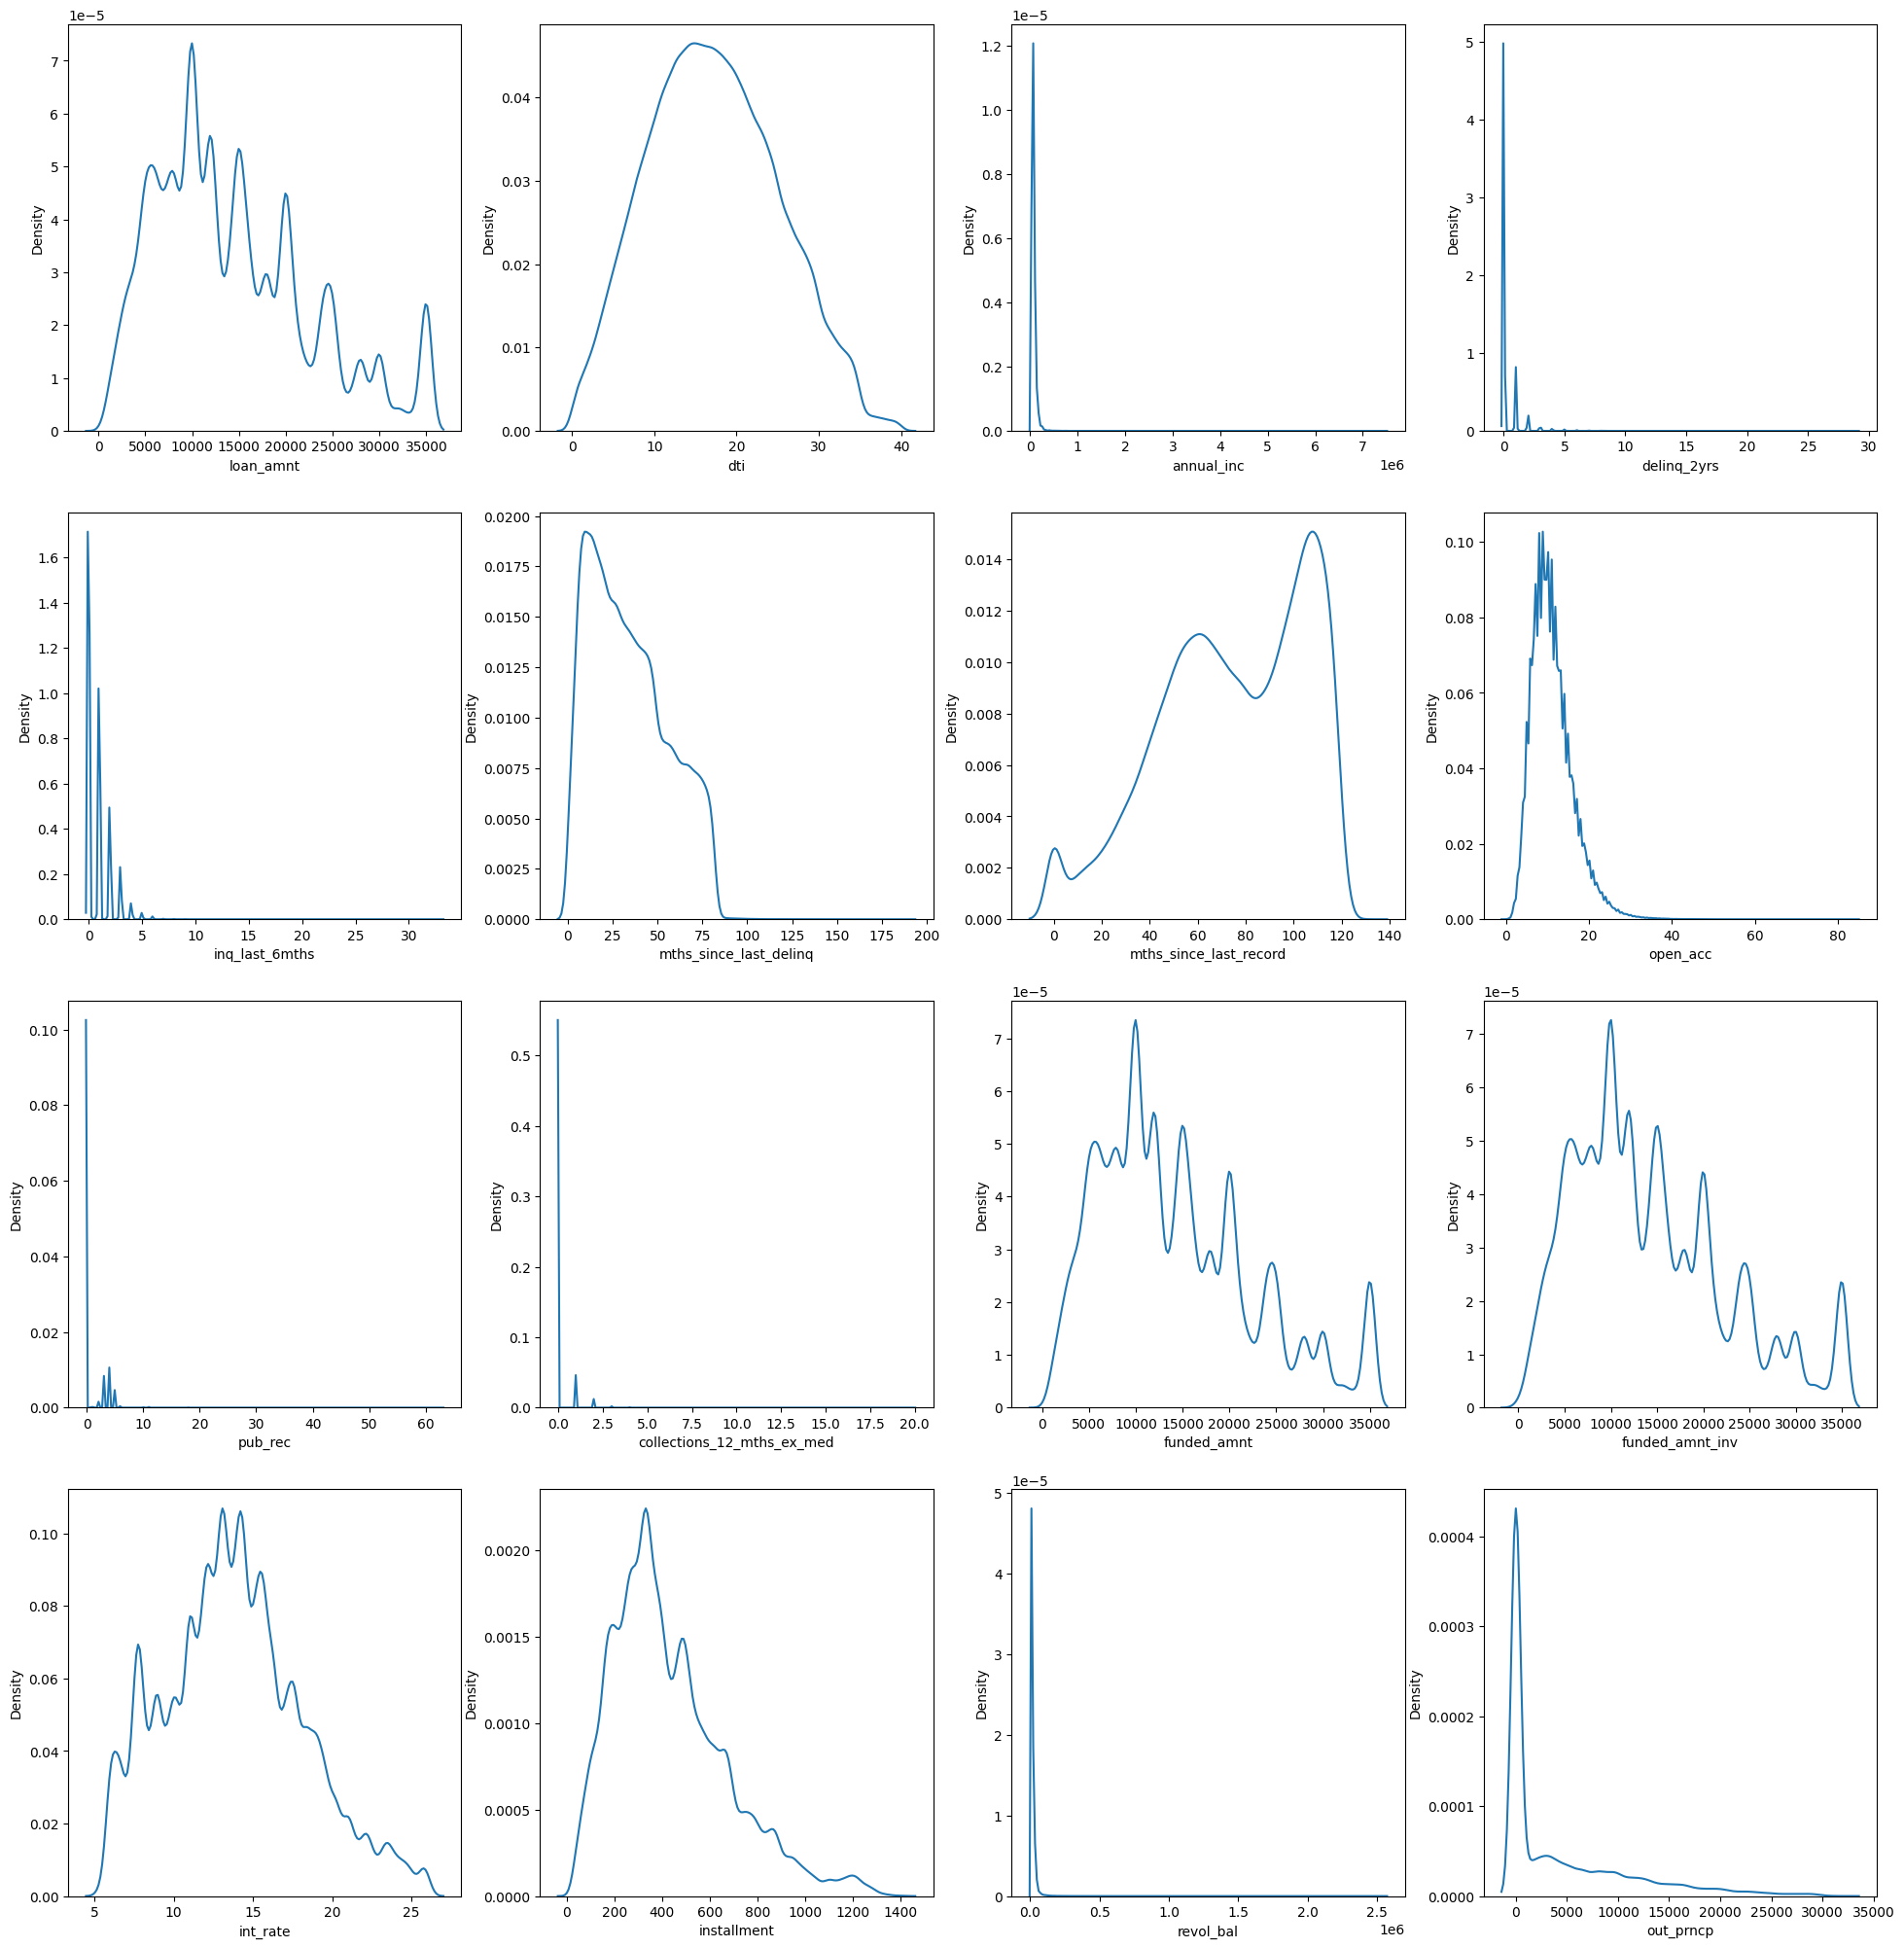

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(24,25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.kdeplot(data=df, x=numCols[i+2])  
plt.show()


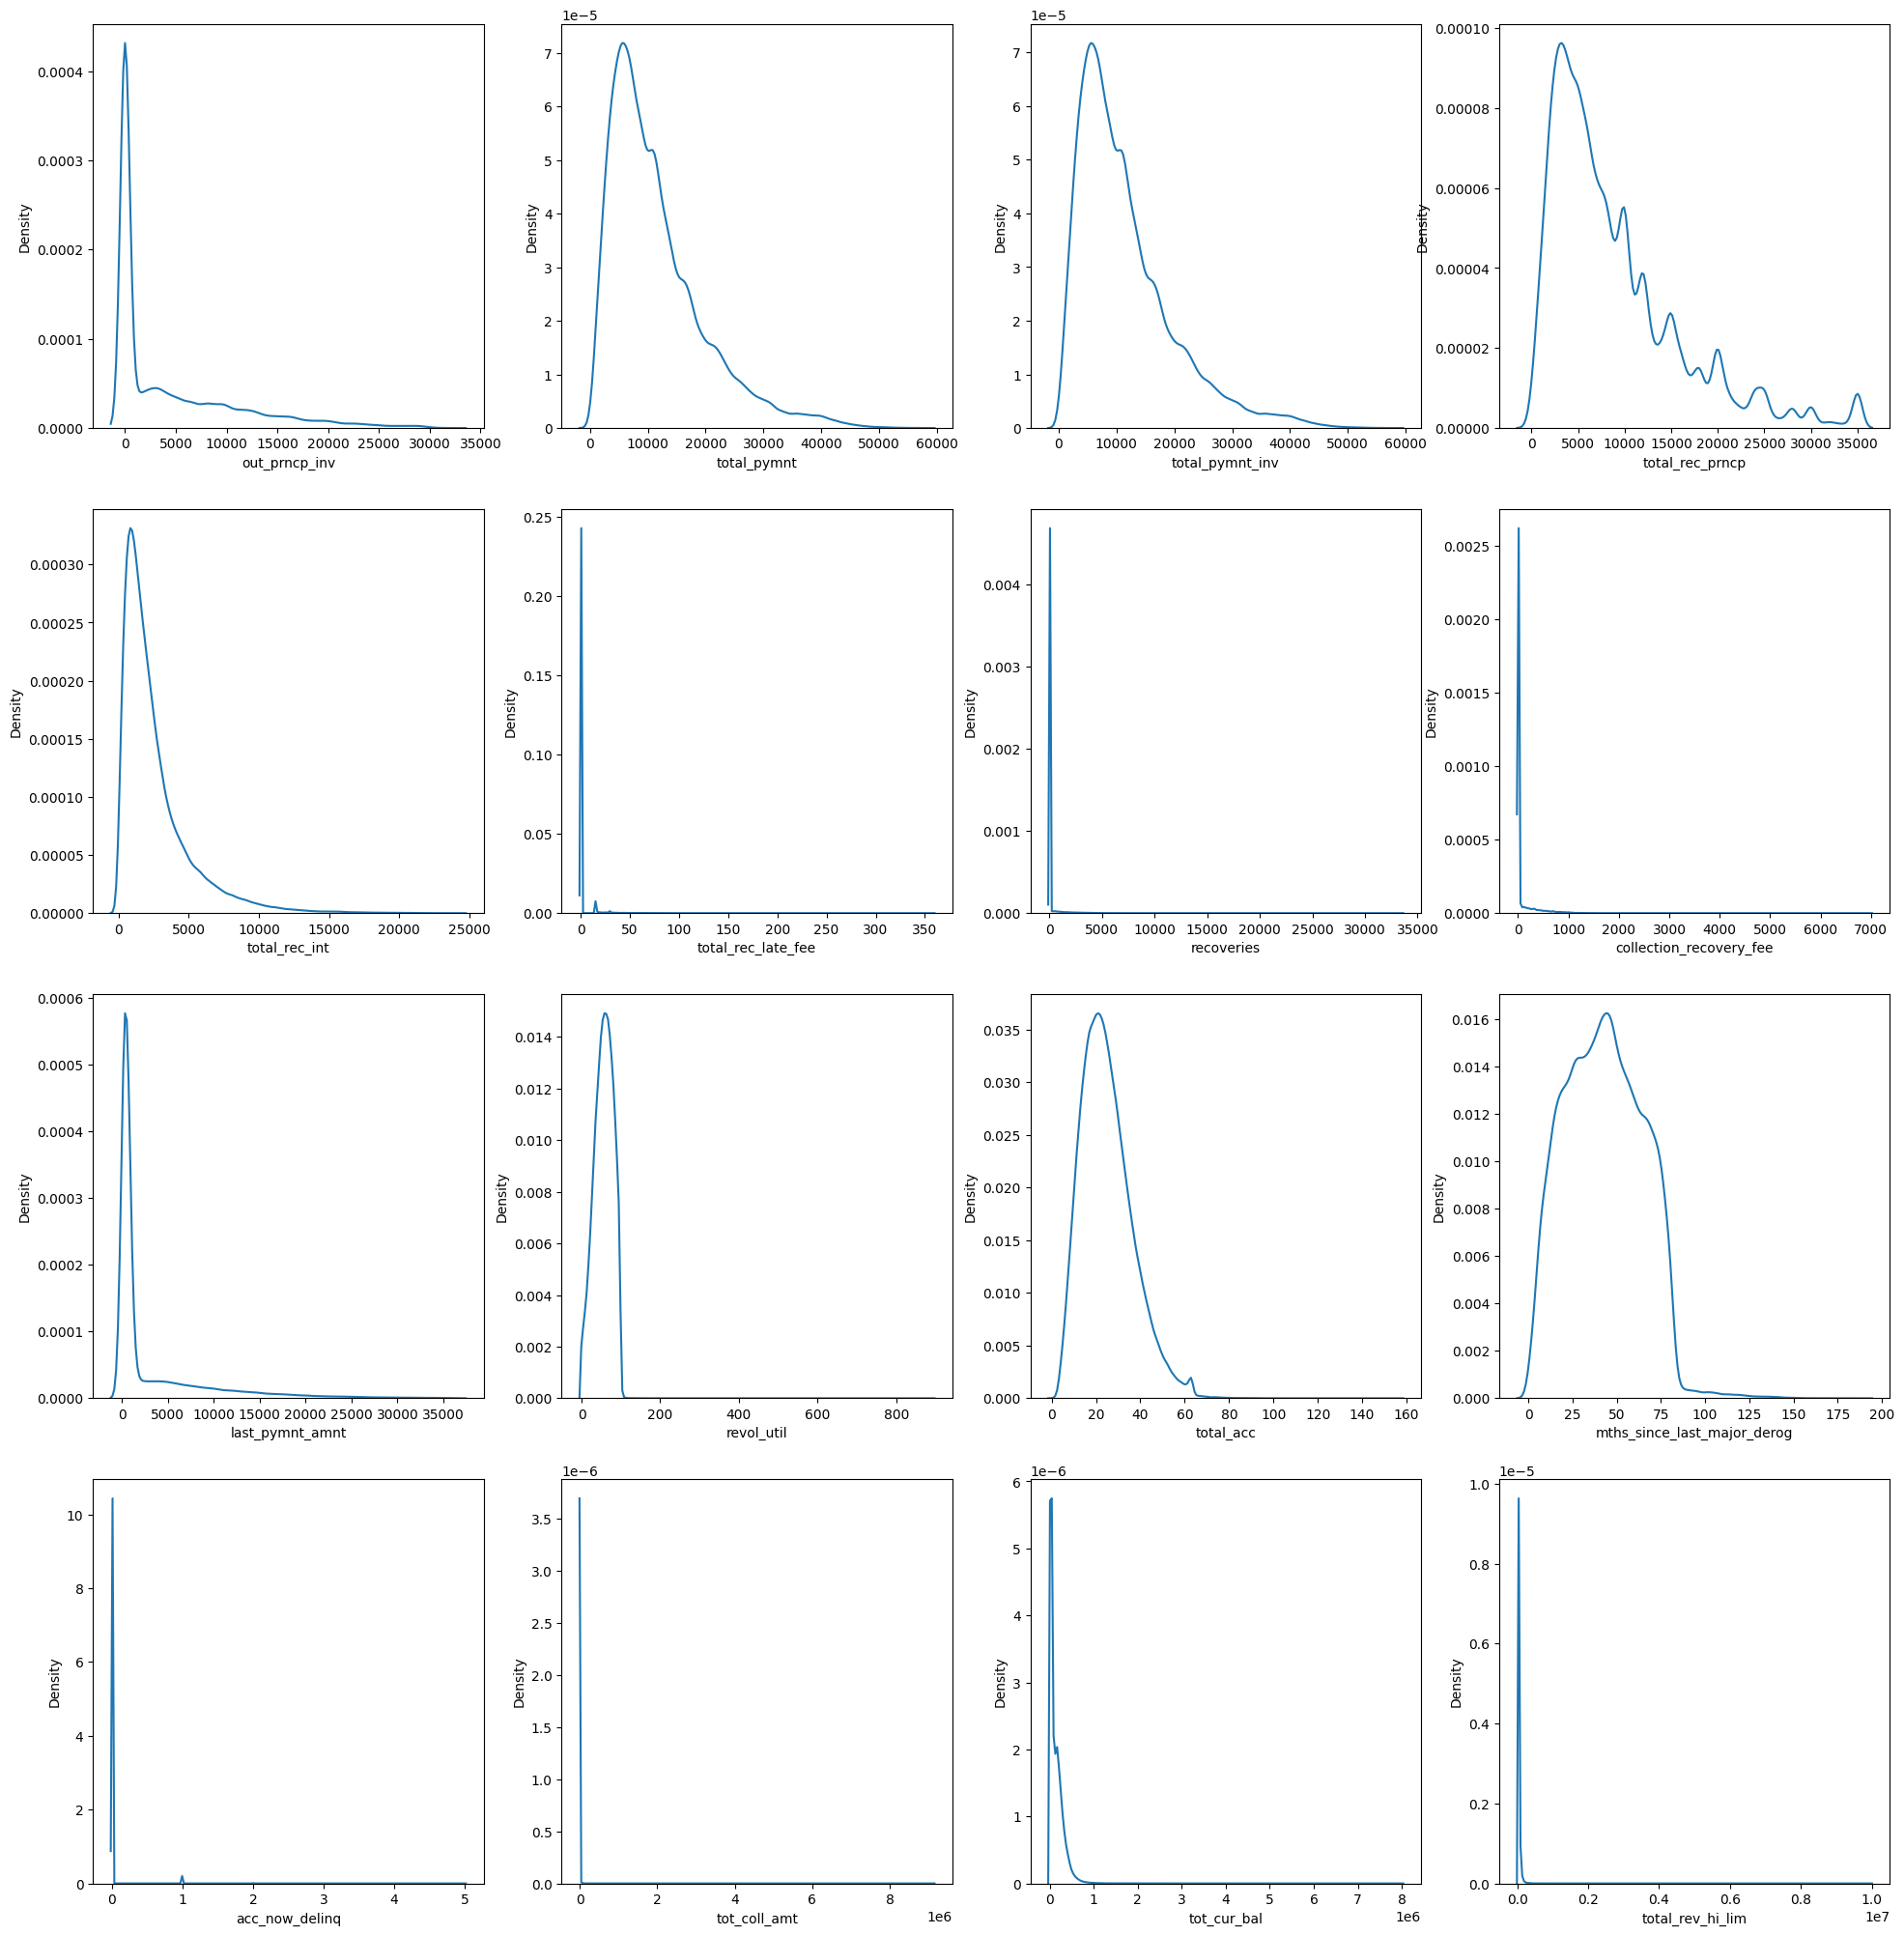

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(24,25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.kdeplot(data=df, x=numCols[i+18])  
plt.show()


<b>Notes: </b>
- it seems that most of the columns distribution are right-skewed (positive skew). This indicates that there are a high value occurs but rare compare the smaller value within the column.

### Categorical Data

Firstly we want to see the how many category in a column. There might be a case such as in column "desc" and "url" not to be a categorical data rather a non-numerical data

In [19]:
for cols in catCols:
    print('------',cols,'------')
    print(cols,'containing',str(df[cols].nunique()),'unique values')
    print('')

------ emp_title ------
emp_title containing 205475 unique values

------ desc ------
desc containing 124436 unique values

------ pymnt_plan ------
pymnt_plan containing 2 unique values

------ term ------
term containing 2 unique values

------ last_pymnt_d ------
last_pymnt_d containing 98 unique values

------ verification_status ------
verification_status containing 3 unique values

------ next_pymnt_d ------
next_pymnt_d containing 100 unique values

------ title ------
title containing 63099 unique values

------ grade ------
grade containing 7 unique values

------ emp_length ------
emp_length containing 11 unique values

------ last_credit_pull_d ------
last_credit_pull_d containing 103 unique values

------ purpose ------
purpose containing 14 unique values

------ earliest_cr_line ------
earliest_cr_line containing 664 unique values

------ addr_state ------
addr_state containing 50 unique values

------ application_type ------
application_type containing 1 unique values

--

<b> Notes: </b>
- it seems as the most categorical unique value is 14 by the column of "loan_type"
- there is also geographical data contained in "addr_state" and "zip_code"
- there is also date input in which will not be utilized

Now let's make a filter for categorical data with 14 and less unique values

In [20]:
CategoricalColumns = []

for cols in catCols:
    length = df[cols].nunique()
    if length <= 14:
        print('------',cols,'------')
        print(cols,'containing',str(length),'unique values')
        print('')
        CategoricalColumns.append(cols)

------ pymnt_plan ------
pymnt_plan containing 2 unique values

------ term ------
term containing 2 unique values

------ verification_status ------
verification_status containing 3 unique values

------ grade ------
grade containing 7 unique values

------ emp_length ------
emp_length containing 11 unique values

------ purpose ------
purpose containing 14 unique values

------ application_type ------
application_type containing 1 unique values

------ loan_status ------
loan_status containing 9 unique values

------ initial_list_status ------
initial_list_status containing 2 unique values

------ home_ownership ------
home_ownership containing 6 unique values



In [23]:
print('CategoricalColumns consists of',str(len(CategoricalColumns)),'columns')
print(CategoricalColumns)

CategoricalColumns consists of 10 columns
['pymnt_plan', 'term', 'verification_status', 'grade', 'emp_length', 'purpose', 'application_type', 'loan_status', 'initial_list_status', 'home_ownership']


now let's see the distribution for each categorical data

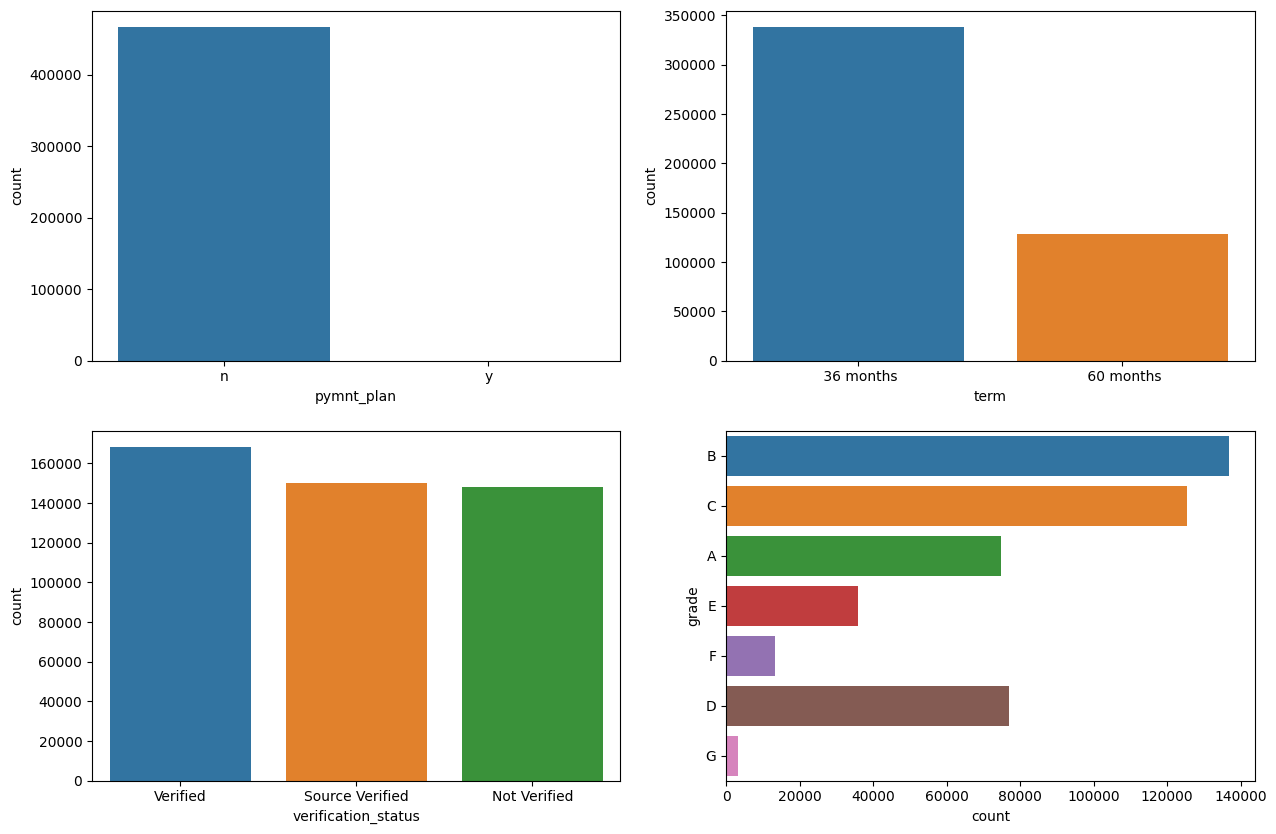

In [32]:
fig = plt.figure(figsize=(15,10))

columns = 2
rows = 2

for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    if df[CategoricalColumns[i]].nunique() >5:
        sns.countplot(data=df, y=CategoricalColumns[i])
    else:
        sns.countplot(data=df, x=CategoricalColumns[i])
plt.show()


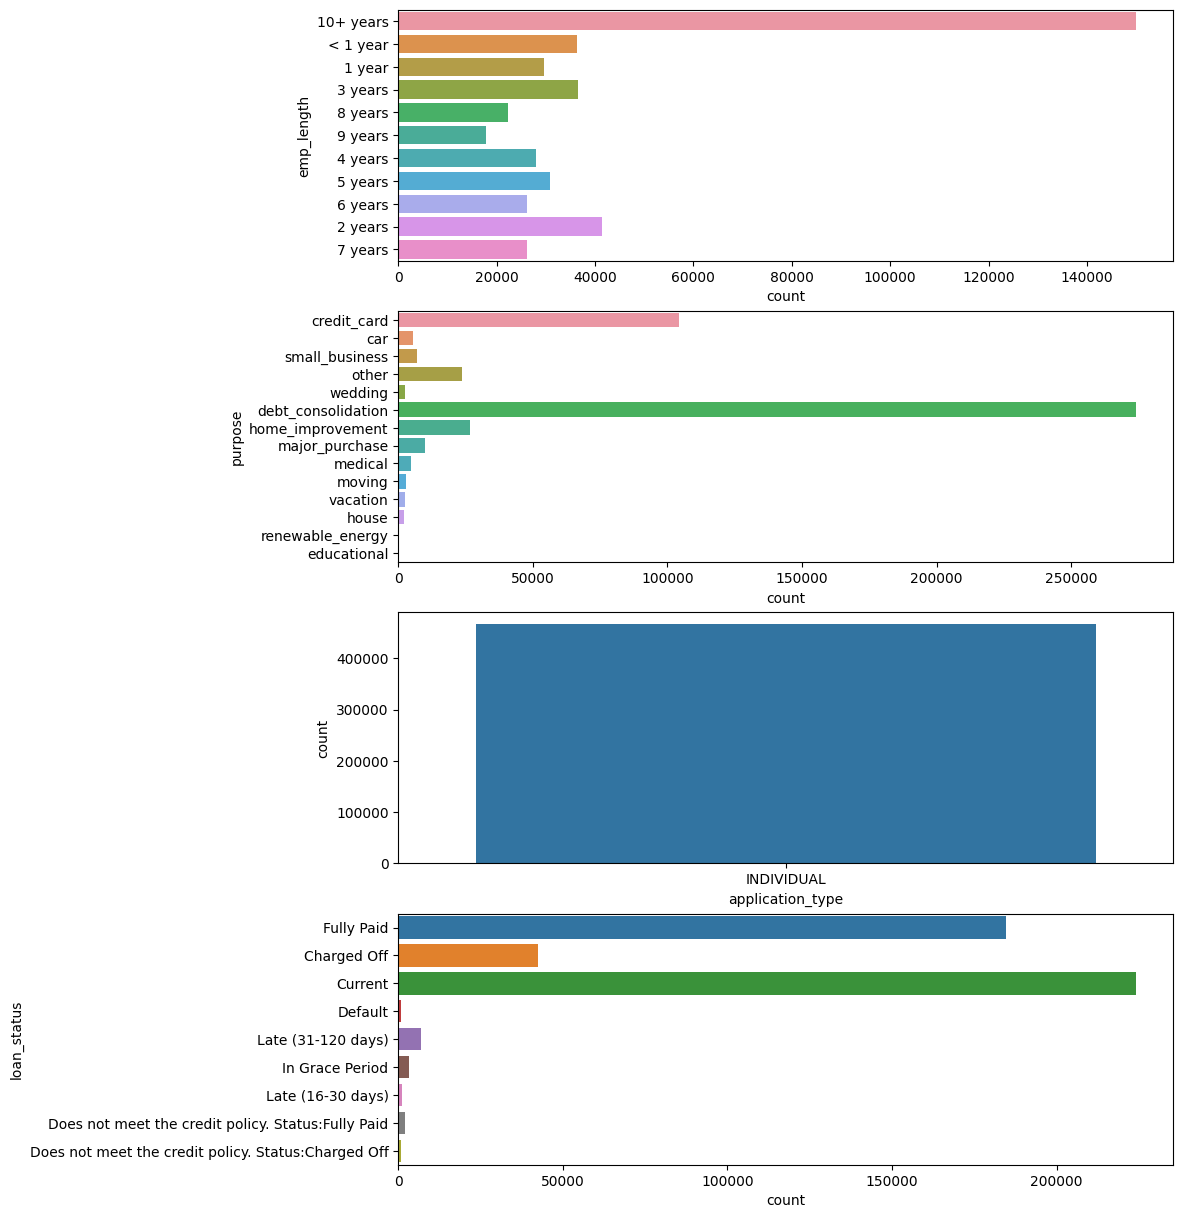

In [42]:
fig = plt.figure(figsize=(10,15))

columns = 1
rows = 4

for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    if df[CategoricalColumns[i+4]].nunique() >5:
        sns.countplot(data=df, y=CategoricalColumns[i+4])
    else:
        sns.countplot(data=df, x=CategoricalColumns[i+4])
plt.show()


<b> Notes: </b>
- It seems that application_type only have 1 input we will consider this as an inactive column.
- loan status can help to determine if the loan is a good or bad loan

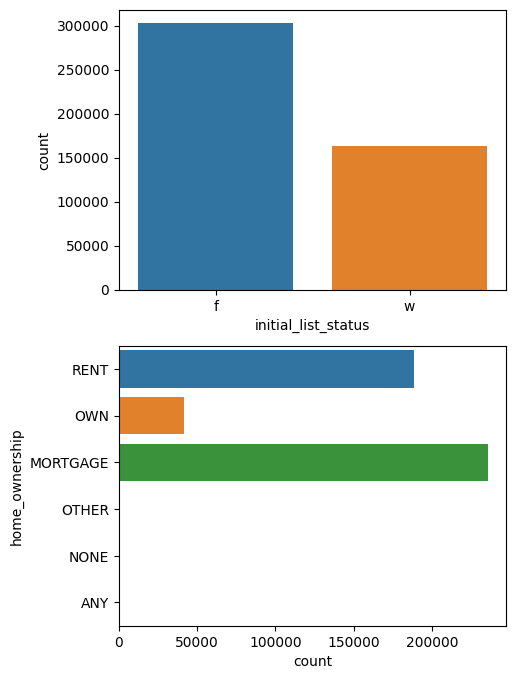

In [47]:
fig = plt.figure(figsize=(5,8))

columns = 1
rows = 2

for i in range(2):
    fig.add_subplot(rows, columns, i+1)
    if df[CategoricalColumns[i+8]].nunique() >5:
        sns.countplot(data=df, y=CategoricalColumns[i+8])
    else:
        sns.countplot(data=df, x=CategoricalColumns[i+8])
plt.show()
